In [52]:
# get all the csvs that end with _deployments.csv in this directory
import glob
csvs = glob.glob('./*/[a-z]*_deployments.csv')
csvs

['./snapshot/snapshot_deployments.csv',
 './aragon/aragon_deployments.csv',
 './daostack/daostack_deployments.csv',
 './realms/realm_deployments.csv',
 './tally/tally_deployments.csv',
 './daohaus/dao_deployments.csv']

In [53]:
# concat into one dataframe
import pandas as pd
df = pd.concat([pd.read_csv(csv) for csv in csvs])
# reindex
df = df.reset_index(drop=True)
df

,platform,platform_id,name,additional,website
0,snapshot,odidao.eth,ODI DAO,NaN,https://snapshot.org/#/odidao.eth
1,snapshot,olodao.eth,YING TG,https://www.partybid.app/buy/0xB74BE402fEfE6bb...,https://snapshot.org/#/olodao.eth
2,snapshot,onearth.eth,OnEarth DAO,"kevinonearth999, https://imagineonearth.xpandr...",https://snapshot.org/#/onearth.eth
3,snapshot,opyn11.eth,opyn11,NaN,https://snapshot.org/#/opyn11.eth
4,snapshot,partyplanningdao.eth,Party Planning DAO,NaN,https://snapshot.org/#/partyplanningdao.eth
...,...,...,...,...,...
21994,daohaus,0xff07943f171b826b3618982a6213f157fbc5e226,NaN,network: xdai version: 2.1,NaN
21995,daohaus,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,network: xdai version: 2.1,NaN
21996,daohaus,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,network: xdai version: 2.1,NaN
21997,daohaus,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,network: xdai version: 2.0,NaN


In [54]:
# save to csv
df.to_csv('all_deployments.csv', index=False)

In [55]:
# what pct have names?
df[df['name'].notnull()].shape[0] / df.shape[0]

0.8574026092095095

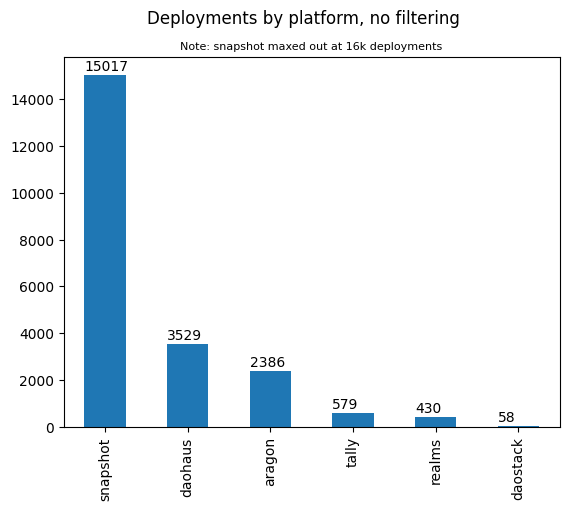

In [56]:
# platform vlaue counts annotated with count
import matplotlib.pyplot as plt
df['platform'].value_counts().plot(kind='bar')
# annotate
for i, v in enumerate(df['platform'].value_counts()):
    plt.text(i - .25, v + 200, str(v))
# title
plt.suptitle('Deployments by platform, no filtering')
plt.title('Note: snapshot maxed out at 16k deployments', fontsize=8)
plt.show()